# Gemini 3 with LangChain - Bootcamp

This notebook demonstrates all key features of Google's Gemini 3 model family using LangChain.

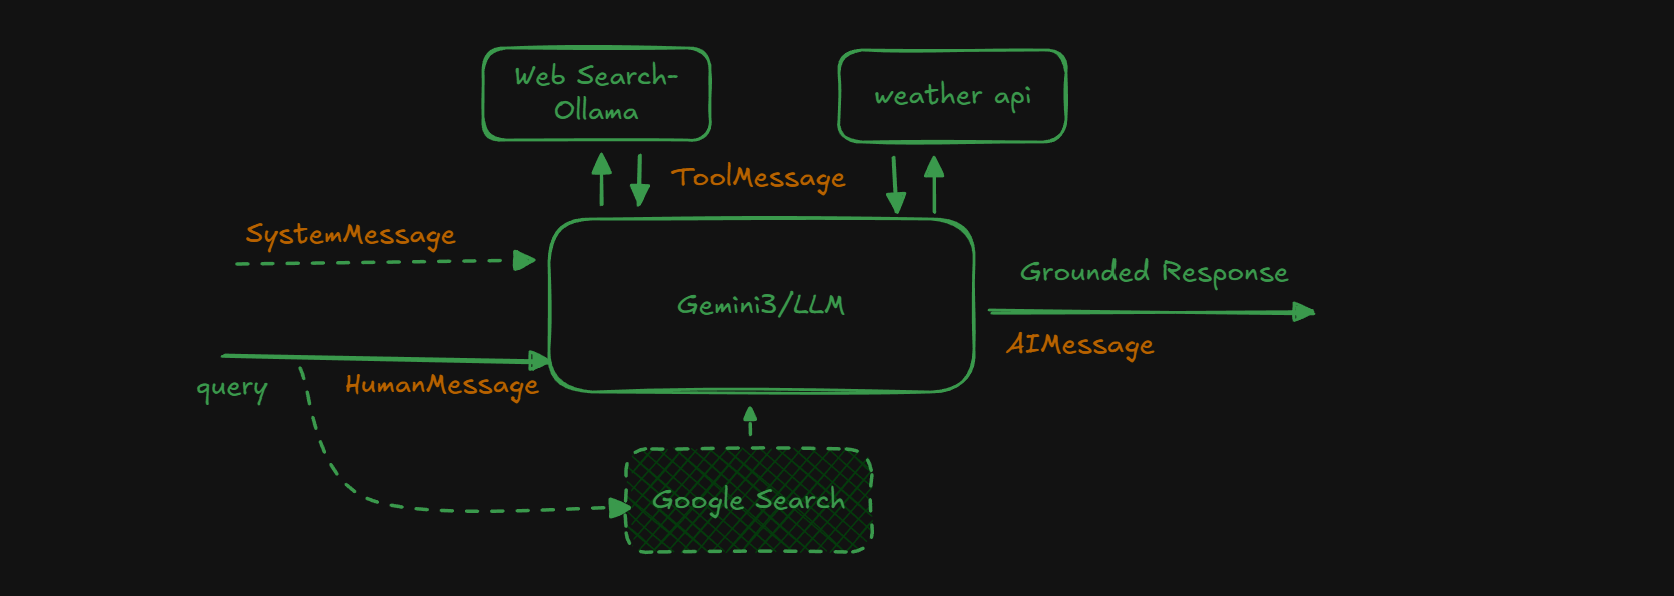

## Gemini 3 Overview

**Gemini 3 Pro** is Google's most intelligent model family, built on state-of-the-art reasoning capabilities.

### Key Features
- **Advanced Reasoning**: Dynamic thinking process with configurable thinking levels
- **1M Token Context**: Up to 1 million token input, 64k token output
- **Multimodal Excellence**: Images, PDFs, audio, video with granular resolution control
- **Knowledge Cutoff**: January 2025
- **Image Generation**: 4K resolution with grounded generation

### Model Variants

| Model | Context (In/Out) | Best For |
|-------|------------------|----------|
| `gemini-3-pro-preview` | 1M / 64k | Complex reasoning, coding, analysis |
| `gemini-3-pro-image-preview` | 65k / 32k | Image generation & editing |
| `gemini-2.5-flash` | 1M / 8k | Fast, cost-effective tasks |

### New Features in Gemini 3
1. **Thinking Level**: Control reasoning depth (`low` or `high`)
2. **Media Resolution**: Granular control per media type (`low`, `medium`, `high`, `ultra_high`)
3. **Temperature**: Keep at default 1.0 (changing can cause degraded performance)
4. **Thought Signatures**: Automatic reasoning context preservation

## Setup

Load environment variables for API authentication.

https://ai.google.dev/gemini-api/docs/pricing

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
# os.getenv("GOOGLE_API_KEY")

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.messages import HumanMessage, SystemMessage, AIMessage, ToolMessage

## Basic Usage

Demonstrates basic message formats and response structures for both Gemini 3 and 2.5 models.

In [4]:
gemini3 = 'gemini-3-flash-preview' # gemini-3-pro-preview
gemini2 = 'gemini-2.5-flash'

system_msg = SystemMessage("You are a helpful AI Assistant")
query = HumanMessage("Explain the theory of reletivity in the simple terms")

messages = [system_msg, query]

In [5]:
model = ChatGoogleGenerativeAI(model=gemini3)
response = model.invoke(messages)

In [6]:
# print(response.text)

response.content

[{'type': 'text',
  'text': 'The Theory of Relativity, developed by Albert Einstein, is actually two different theories: **Special Relativity** and **General Relativity**.\n\nTo understand them in simple terms, you have to throw out the idea that time and space are the same for everyone.\n\n---\n\n### 1. Special Relativity (The "Speed" Part)\nThis part focuses on how things move through space. It is based on two main ideas:\n\n*   **The Speed Limit of the Universe:** Einstein realized that the speed of light (about 300,000 kilometers per second) is the absolute speed limit. Nothing can go faster. Even more weirdly, light always travels at the same speed, no matter how fast you are moving toward it or away from it.\n*   **Time is Flexible:** Because the speed of light must stay constant, something else has to change: **Time.**\n    *   **The Analogy:** Imagine you have a twin. You stay on Earth, and your twin goes on a rocket ship traveling near the speed of light. When your twin return

In [7]:
response.content_blocks

[{'type': 'text',
  'text': 'The Theory of Relativity, developed by Albert Einstein, is actually two different theories: **Special Relativity** and **General Relativity**.\n\nTo understand them in simple terms, you have to throw out the idea that time and space are the same for everyone.\n\n---\n\n### 1. Special Relativity (The "Speed" Part)\nThis part focuses on how things move through space. It is based on two main ideas:\n\n*   **The Speed Limit of the Universe:** Einstein realized that the speed of light (about 300,000 kilometers per second) is the absolute speed limit. Nothing can go faster. Even more weirdly, light always travels at the same speed, no matter how fast you are moving toward it or away from it.\n*   **Time is Flexible:** Because the speed of light must stay constant, something else has to change: **Time.**\n    *   **The Analogy:** Imagine you have a twin. You stay on Earth, and your twin goes on a rocket ship traveling near the speed of light. When your twin return

In [8]:
model = ChatGoogleGenerativeAI(model=gemini2)
response = model.invoke(messages)

In [9]:
response.text
response.content
response.content_blocks

[{'type': 'text',
  'text': 'Okay, let\'s break down the theory of relativity into simple, bite-sized pieces without getting bogged down in math.\n\nImagine you\'re trying to describe something, but your description changes depending on *where you are* and *how fast you\'re moving*. That\'s the core idea of relativity!\n\nAlbert Einstein came up with two main theories of relativity:\n\n---\n\n### 1. Special Relativity (1905)\n\nThis theory deals with objects moving at **constant speeds** (no acceleration) and has two main ideas:\n\n*   **Idea 1: The Laws of Physics are the Same for Everyone (in constant motion).**\n    *   **Analogy:** Imagine you\'re on a perfectly smooth train moving at a constant speed. If you drop a ball, it falls straight down. Someone outside the train, watching it go by, would see the ball fall in a curve as the train moves. Both of you are correct from your own "frame of reference." The laws of physics (like gravity making the ball fall) work the same way for b

In [10]:
response.usage_metadata

{'input_tokens': 18,
 'output_tokens': 2794,
 'total_tokens': 2812,
 'input_token_details': {'cache_read': 0},
 'output_token_details': {'reasoning': 1693}}

In [11]:
response.response_metadata

{'finish_reason': 'STOP',
 'model_name': 'gemini-2.5-flash',
 'safety_ratings': [],
 'model_provider': 'google_genai'}

## Streaming

Stream tokens in real-time as they're generated, improving user experience for long responses.

In [12]:
model = ChatGoogleGenerativeAI(model=gemini2)


In [13]:
query = "Explain the theory of relativity in the simple terms."

for chunk in model.stream(query):
    print(chunk.text, end="", flush=True)

    # break

Okay, let's break down Einstein's Theory of Relativity into its two main parts, Special Relativity and General Relativity, using simple language and analogies.

### The Big Idea Behind Both: Everything is Relative (but not in a "anything goes" way)

Before Einstein, people thought space and time were like a fixed, unchanging stage where everything happened. Einstein said, "Nope! Space and time are flexible, and how you experience them depends on your motion and gravity."

---

## Part 1: Special Relativity (1905)

This part deals with how space and time are related for objects moving at **constant speeds** (no acceleration).

**The Two Core Ideas:**

1.  **The Principle of Relativity:** The laws of physics are the same for everyone, no matter how fast they're moving, as long as they're moving at a constant speed in a straight line.
    *   *Analogy:* Imagine you're on a perfectly smooth train moving at a constant speed. If you drop a ball, it falls straight down. If you throw it, it ac

## Multimodal Capabilities

Process images, PDFs, audio, and video alongside text. Gemini 3 supports multiple input modalities with granular resolution control.

In [14]:
model = ChatGoogleGenerativeAI(model=gemini3)


human_msg = HumanMessage(
    [
        {'type': 'text', 'text': 'Describe the image provided'},
        {'type': 'image',
         'url': 'https://www.shutterstock.com/image-vector/vector-cute-baby-panda-cartoon-600nw-2427356853.jpg'}
    ]
)

response = model.invoke([system_msg, human_msg])

In [15]:
response

AIMessage(content=[{'type': 'text', 'text': "A high-contrast, cartoon-style illustration of a cute giant panda sitting upright. \n\nThe panda is rendered in a clean vector style with bold black outlines. It has a large, round white head with iconic black patches around its wide, sparkly black eyes. Its small, rounded ears have pink centers, matching its small, smiling mouth and the pads on its large black paws. The panda's body is primarily black across the shoulders and limbs, with a white belly.\n\nThe panda is positioned in the center, surrounded by tall, vibrant green blades of grass that fan out behind it. The entire illustration is set against a solid white background, giving it a clean and playful appearance.", 'extras': {'signature': 'EqQYCqEYAXLI2nyvHDCgMvCeabrZTNsJU33+TM6UHquvlecBnqjNqOQ3yke54w2DZVC+6EwfnnDDsOOnrwsHmzjPbf3O4W/p9AgCQrg84tK2P2cPPijGeu37c3d0hDUPZDuJPxacsRuNLoWcx35NSQe97bWHc25LDXIoZ1pW7DtHavhZc8HPYOoYlUM2n2zs3jJ73vVFJwKDWEY+LgnHQmxjZHi7bPsJm7j/zGK1LCSxqZ1kDXqbYWh

In [16]:
print(response.text)

A high-contrast, cartoon-style illustration of a cute giant panda sitting upright. 

The panda is rendered in a clean vector style with bold black outlines. It has a large, round white head with iconic black patches around its wide, sparkly black eyes. Its small, rounded ears have pink centers, matching its small, smiling mouth and the pads on its large black paws. The panda's body is primarily black across the shoulders and limbs, with a white belly.

The panda is positioned in the center, surrounded by tall, vibrant green blades of grass that fan out behind it. The entire illustration is set against a solid white background, giving it a clean and playful appearance.


### Image Analysis from Local File

Base64 encode local images, PDFs, or audio files for analysis.

In [17]:
import base64

mime_type = "image/png"

image_bytes = open("data/images/panda.png", 'rb').read()
bytes_base64 = base64.b64encode(image_bytes).decode('utf-8')

In [18]:
bytes_base64

'iVBORw0KGgoAAAANSUhEUgAAAlgAAAJYCAIAAAAxBA+LAAAQAElEQVR4AexdBYBdxdU+M3PlyWrchSDBg7u7eym0pbSlhQql1L39W+rUhXoLtKW0tMUh7u7uttlssm7P7r0j/zfvbTYJJJCEDUTecO7cuSNnzjkzc86cmZeFm2IoSqAogaIEihIoSuAwlgCnYihKoCiBogSKEihK4DCWQNEQHk6DX+S1KIGiBIoSKErgdRIoGsLXiaSYUZRAUQJFCRQlcDhJoGgID6fRLvJ6OEmgyGtRAkUJ7KEEioZwDwVVrFaUQFECRQkUJXBoSqBoCA/NcS1yVZRAUQKHkwSKvL4lCRQN4VsSX7FxUQJFCRQlUJTAwS6BoiE82EewSP9+kYAyebT52Bij81+FOJ8sRkUJFCVw6EjgIDOEh47gi5wc2BIQjKwtZGSMyUU5EFu0ghBCEYoSOCQlUDSEh+SwFpl6qxKA2TNGhxQ2tNVu3VpjyGCpKPVW0RbbFyVQlMABKAGs7gOQqiJJRQkQ0TspBA1LyE1kMrUN1UzYZSI1CfFOklTsuyiBogT2kwTsCt9PqItoixI4eCXgcOKkNQuqtq5PliWJGLM5VAxFCRQlcOhJoGgID70xLXLUBRIwCKRSYUtWpWNJHxhxOhoVz0YhiP0ERbRFCbxzEigawndO9sWeD2QJaMVI1dRtUix0uavIMGIHMr1F2ooSKEpgnyVQNIT7LLpiw0NYAtowDbu3aesm7nBGzGgtiNziJeEhPOZF1t5GCRxoXfEDjaAiPUUJHAgS4NzRRK3tbcmyUkPM4bCDyAAcCNQVaShKoCiBrpRA0RB2pTSLuA4NCcDcKQrbTWs2m6qoqMAiYYcGY0UuihIoSmBXEsAa31V2Ma9LJFBEcrBKQGtStc1bozDs0703UWGZFOKDlaUi3UUJFCWwOwkU1/buJFPMP3wlYAiGMKprqjHalMfKGXVYwsNXIkXOixI4pCVQNISH9PAWmds

In [19]:
model = ChatGoogleGenerativeAI(model=gemini2)


human_msg = HumanMessage(
    [
        {'type': 'text', 'text': 'Describe the image provided'},
        {'type': 'image',
         'base64': bytes_base64,
         "mime_type": mime_type}
    ]
)

response = model.invoke([system_msg, human_msg])

In [20]:
response.pretty_print()

================================== Ai Message ==================================

This image is a vibrant and adorable cartoon illustration of a baby panda sitting amongst green foliage on a white background.

Here's a detailed description:

*   **Subject:** The central figure is a very cute, chubby panda cub. It is rendered in a classic cartoon style with thick, clean outlines.
*   **Coloration:** The panda displays its iconic black and white fur pattern. Its head, belly, and inner arms are white, while its ears, eye patches, nose, outer arms, and legs are black.
*   **Facial Features:** The panda has large, expressive black eyes with small white highlights that give them a sparkling, innocent look. Its nose is a small, black triangle, and it has a wide, friendly smile revealing a pink tongue. The inner parts of its round, black ears are also a soft pink.
*   **Pose:** The panda is sitting upright, facing directly forward. Its little paws are visible, with soft pink paw pads on the so

### PDF Document Analysis

Extract and analyze content from PDF files. Recommended to use `media_resolution_medium` for PDFs.

In [21]:
## Reading media from local file and encoding to base64
## Now use smaller model for faster response

## image mime type example
# mime_type = "image/png", type = image

## pdf mime type example
# mime_type = "application/pdf", type = "file"

## audio mime type example
# mime_type = "audio/mpeg", type = "audio"

# pdf_bytes = open(r'data\rag-data\apple\apple 10-q q1 2024.pdf', 'rb').read()
pdf_bytes = open(r'data\apple 10-q q1 2024.pdf', 'rb').read()
pdf_base64 = base64.b64encode(pdf_bytes).decode('utf-8')

mime_type = "application/pdf"


human_msg = HumanMessage(
    [
        {'type': 'text', 'text': 'summarize the key financial highlights from this quarterly report.'},
        {'type': 'file',
         'base64': pdf_base64,
         'mime_type': mime_type}
    ]
)


model = ChatGoogleGenerativeAI(model=gemini2)

In [22]:
response = model.invoke([system_msg, human_msg])

In [23]:
print(response.text)

Based on the provided quarterly report (Form 10-Q) for the period ended March 30, 2024, here are the key financial highlights for Apple Inc.:

**For the Three Months Ended March 30, 2024 (compared to April 1, 2023):**

*   **Total Net Sales Decline:** Total net sales decreased by approximately 4% to **$90.753 billion** from $94.836 billion in the prior year quarter.
    *   **Product Sales Decrease:** Product net sales declined by about 9.5% to **$66.886 billion** (from $73.929 billion). This was largely driven by lower sales of iPhone (down 10%), iPad (down 17%), and Wearables, Home and Accessories (down 10%). Mac sales, however, increased by 4%.
    *   **Services Sales Growth:** Services net sales showed strong growth, increasing by approximately 14.1% to **$23.867 billion** (from $20.907 billion), primarily due to higher net sales from advertising, the App Store, and cloud services.
*   **Net Income and EPS Slight Decline:** Net income slightly decreased by 2.2% to **$23.636 billio

In [24]:
response.usage_metadata

{'input_tokens': 7242,
 'output_tokens': 4375,
 'total_tokens': 11617,
 'input_token_details': {'cache_read': 0},
 'output_token_details': {'reasoning': 3368}}

## Tool Calling (Function Calling)

Bind custom tools to the model for extended capabilities like web search or API calls.

In [25]:
import sys
sys.path.append('../')


from scripts import base_tools

In [26]:
response = base_tools.web_search.invoke({'query': "what is the latest stock news"})

In [27]:
response

[WebSearchResult(content="Subscribe to read\n[Accessibility help](https://www.ft.com/accessibility)[Skip to navigation](#site-navigation)[Skip to main content](#site-content)[Skip to footer](#site-footer)\n* [Sign In](https://www.ft.com/login?location=/content/e4ae8299-e0a4-4e36-8c8f-d59b22202284)\n* [Subscribe](https://www.ft.com/products?segmentId=f860e6c2-18af-ab30-cd5e-6e3a456f9265)\n[Open side navigation menu](#o-header-drawer)[Open search bar](#o-header-search-primary)\n[Financial Times](https://www.ft.com/)\n[Subscribe](https://www.ft.com/products?segmentId=f860e6c2-18af-ab30-cd5e-6e3a456f9265)[Sign In](https://www.ft.com/login?location=/content/e4ae8299-e0a4-4e36-8c8f-d59b22202284)\nSearch theFTSearchClose search barClose\n[Menu](#)[Search](#)\n* [Home](https://www.ft.com/)\n* [World](https://www.ft.com/world)\n* [US](https://www.ft.com/us)\n* [Companies](https://www.ft.com/companies)\n* [Tech](https://www.ft.com/technology)\n* [Markets](https://www.ft.com/markets)\n* [Climate]

In [28]:
response = base_tools.get_weather.invoke({'location': 'Mumbai'})

In [29]:
model = ChatGoogleGenerativeAI(model=gemini2)

model_with_tools = model.bind_tools([base_tools.web_search, base_tools.get_weather])

In [30]:
model_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', client=<google.genai.client.Client object at 0x00000228552B4450>, default_metadata=(), model_kwargs={}), kwargs={'tools': [{'type': 'function', 'function': {'name': 'web_search', 'description': 'Perform a live web search using Ollama Cloud Web Search API for real-time information and news.\n\nInput:\n    query: search query string\n\nOutput:\n    JSON string of top results (max_results=2).', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'funct

In [31]:
response = model_with_tools.invoke("What is the weather in mumbai? and What is the US stock news today?")

In [32]:
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'web_search', 'arguments': '{"query": "US stock news today"}'}, '__gemini_function_call_thought_signatures__': {'1f1425c6-fe3c-44e3-9efe-e9013287a5bb': 'CvUEAXLI2nxASDXQoj4Db0Mh5ABWPnkynLQhFJysFpeWCbt9CHucumA83hlfiPmu16kKYS1991tCmvNqo8erbaVD605fXig7PxHwjuNr480CGiwncoABus6e2PwizPdLH0c+SdYmBhm+aZbCKHZfYH1V+cMcj3Fsb3v1P2Xq8bgNZZFtTuVj7vJU2N3cKd6BCsklLQPVcS+i7Es0esOaJHyvalXIA48qyfD2/WxFWZdxuSx7WmSQVQQYLhysvEoXXCqUsJFh705VkDDDhmk6ETfNAhaQ5wPJC7vGLuUE9vA8qm+DWmeoGlSnUx6jh7NIRnfwNYVAkI7PBxhGJJtAQ3aimF9Vb5xpKSWZivAPFzEZDxHcB+MC4NXzSb8cLpc9TXy/G2/odY++IMg/WAIAo5qaZsEVOKgxw4QVwwz2xCbKGifROgYxRX5rplr1nXo+6xapSn4Lrr6w6ZrZ4S7qyNDiaYFDPaqN4yRy+aCBrAvtCvsT6d7BatwcbZRWQImXtvpB0/mBpNMswvTClzUjDZ9sEWmqMcqgDKSMAAm1wkTCydVCvK66iRGmKR1KiOAvCjOtiglk15hFXcrxO+uAX3BAFwGekduZj8S0HqFdCzIUw8lqk8RkP+Jh2i34QJgF074Nad9ONmkzAakguepH2KuBSFKmSv+2PGCWgaaPNgmUGTyyQNzekRgegZKiGlcvo9L2WJChuI6PRzFCvShbVV8HYxq/1478x8Uarhirg1J8ETN51/6xD46bOMPAZsHhdVBhvL4f4SCd

## Thinking Support (Reasoning)

Configure the model's reasoning depth with `thinking_budget` or `thinking_level`. 

**Gemini 3 Recommendation**: Use `thinking_level="high"` (default) for complex tasks, `"low"` for simple tasks.

**Documentation**: https://ai.google.dev/gemini-api/docs/thinking

Control reasoning depth:
- `thinking_budget`: Legacy parameter (number of tokens)
- `thinking_level`: New parameter (`"low"` or `"high"`)
- `include_thoughts`: Show reasoning process in response

In [33]:
model = ChatGoogleGenerativeAI(model=gemini2,
                               thinking_budget=100,
                               include_thoughts=True)

In [34]:
response = model.invoke(query)

In [35]:
response.content_blocks

[{'type': 'reasoning',
  'reasoning': '**Relativity: Breaking It Down for Clarity**\n\nOkay, so I\'m being asked to explain relativity in simple terms. That means ditching the tensors and integrals and focusing on the core ideas, the “why” rather than the “how.” My mind immediately jumps to deconstructing the request itself. "Simple terms" means relatable analogies, avoiding complex jargon, and highlighting the fundamental concepts. I need to make this approachable for someone already familiar with the broader field. No need to patronize, just clarify.\n\nNow, I need to pinpoint the key components. Since the prompt doesn\'t specify which aspect, I\'ll start with both Special Relativity (SR) and General Relativity (GR), but I will probably concentrate on SR, since it\'s the foundation. And if the user wants me to do a deep dive, I can do so. With SR, the foundation starts with two postulates: the Principle of Relativity, which basically says the laws of physics are the same for all obse

In [36]:
response.usage_metadata

{'input_tokens': 11,
 'output_tokens': 1411,
 'total_tokens': 1422,
 'input_token_details': {'cache_read': 0},
 'output_token_details': {'reasoning': 98}}

In [37]:
model = ChatGoogleGenerativeAI(model=gemini2,
                               thinking_budget=0,
                               include_thoughts=True)

response = model.invoke(query)
response.usage_metadata

{'input_tokens': 11,
 'output_tokens': 594,
 'total_tokens': 605,
 'input_token_details': {'cache_read': 0}}

## Built-in Tools

Google Gemini provides native tools: Google Search and Code Execution. These require no additional setup.

Google Gemini supports a variety of built-in tools, which can be bound to the model in the usual way.

In [38]:
model = ChatGoogleGenerativeAI(model=gemini2)

model_with_tools = model.bind_tools([{'google_search': {}}, {'code_execution': {}}])

In [39]:
response = model_with_tools.invoke(query)

In [40]:
response.content_blocks

[{'type': 'text',
  'text': 'The theory of relativity, developed by Albert Einstein, is actually two interconnected theories: **special relativity** and **general relativity**. They fundamentally changed our understanding of space, time, gravity, and the universe.\n\nHere\'s a breakdown in simple terms:\n\n---\n\n### 1. Special Relativity (1905)\n\nThis theory deals with how space and time are relative for observers who are moving at constant speeds relative to each other. It\'s based on two main ideas:\n\n*   **The laws of physics are the same for everyone in uniform motion.**\n    *   Imagine you\'re on a train moving at a constant speed, and you can\'t see outside. If you toss a ball in the air, it behaves exactly the same way as if you were standing still on the ground. The laws of physics (like gravity) work the same in both scenarios.\n\n*   **The speed of light in a vacuum is the same for everyone, no matter how fast they\'re moving.**\n    *   This is the really mind-bending pa

In [41]:
query = "When is the next total solar eclipse in the US and what is 3 + 2?"
response = model_with_tools.invoke(query)

d:\Courses\Udemy\AI Agent Projects\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:1076: UserWarning: 
        - 'executable_code': Always present.
        - 'execution_result' & 'image_url': May be absent for some queries.

        Validate before using in production.

  warnings.warn(


In [42]:
print(response.text)

The answer to 3 + 2 is 5.The next total solar eclipse in the US will be on March 30, 2033, visible only in Alaska. The next total solar eclipse visible in the contiguous United States will be on August 23, 2044, in parts of Montana and the Dakotas, followed by a more widespread eclipse on August 12, 2045, spanning from California to Florida.

3 + 2 = 5.


In [43]:
response.content_blocks

[{'type': 'text', 'text': 'The answer to 3 + 2 is 5.'},
 {'type': 'server_tool_call',
  'name': 'code_interpreter',
  'args': {'code': 'concise_search("next total solar eclipse in US")\n',
   'language': <Language.PYTHON: 'PYTHON'>},
  'id': '17c0f47f-0c8a-4859-b492-1fd7ca70015b'},
 {'type': 'server_tool_result',
  'tool_call_id': '',
  'status': 'success',
  'output': 'Looking up information on Google Search.\n',
  'extras': {'block_type': 'code_execution_result', 'outcome': 1}},
 {'type': 'text',
  'text': 'The next total solar eclipse in the US will be on March 30, 2033, visible only in Alaska. The next total solar eclipse visible in the contiguous United States will be on August 23, 2044, in parts of Montana and the Dakotas, followed by a more widespread eclipse on August 12, 2045, spanning from California to Florida.\n\n3 + 2 = 5.'}]

## Context Caching

Cache large documents to reduce costs and latency for repeated queries. Minimum 2,048 tokens required.

**Benefits**:
- Reduced API costs
- Faster response times
- Ideal for analyzing large documents repeatedly

**Resources**:
- [Caching Guide](https://ai.google.dev/gemini-api/docs/caching?hl=en&lang=python#pdfs_1)
- [Pricing Details](https://ai.google.dev/gemini-api/docs/pricing)

In [44]:
import time
from google import genai
from google.genai.types import CreateCachedContentConfig, Content, Part

In [45]:
client =genai.Client()

In [46]:
client

### Initialize Client and Upload Files

In [48]:
file_paths = [
    "data/apple 10-q q1 2024.pdf",
    "data/apple 10-q q2 2024.pdf"
]

uploaded_files = []
for path in file_paths:
    file = client.files.upload(file=path)
    while file.state.name == "PROCESSING":
        time.sleep(2)
        file = client.files.get(name=file.name)

    uploaded_files.append(file)

In [49]:
uploaded_files

[File(
   create_time=datetime.datetime(2026, 1, 11, 6, 33, 30, 710353, tzinfo=TzInfo(0)),
   expiration_time=datetime.datetime(2026, 1, 13, 6, 33, 29, 926734, tzinfo=TzInfo(0)),
   mime_type='application/pdf',
   name='files/knxccrzxhm34',
   sha256_hash='YjE5YjFmMTc2YzVjZWFmOWU2ZWE1MjkwNzAxMzQ4MGViMTc3MTY5NjIzNTFmOGZkZmUwYWQ0YjEzYmIzM2VkMA==',
   size_bytes=280756,
   source=<FileSource.UPLOADED: 'UPLOADED'>,
   state=<FileState.ACTIVE: 'ACTIVE'>,
   update_time=datetime.datetime(2026, 1, 11, 6, 33, 30, 710353, tzinfo=TzInfo(0)),
   uri='https://generativelanguage.googleapis.com/v1beta/files/knxccrzxhm34'
 ),
 File(
   create_time=datetime.datetime(2026, 1, 11, 6, 33, 33, 173060, tzinfo=TzInfo(0)),
   expiration_time=datetime.datetime(2026, 1, 13, 6, 33, 32, 310367, tzinfo=TzInfo(0)),
   mime_type='application/pdf',
   name='files/6nmonrzr3nl0',
   sha256_hash='ZDY1YzAyMDM0NThlZjRkZGQ1ZDgwZjU1ZTZjNjVhOTkyODBjNzQzOWI3OTJiZTNiNTkyNDU5ZjRhYmFmN2RhNw==',
   size_bytes=333438,
   source=<

### Create Cache

Cache content for 1800 seconds (30 minutes) with system instructions.

In [50]:
parts = []
for f in uploaded_files:
    part = Part.from_uri(file_uri=f.uri, mime_type=f.mime_type)
    parts.append(part)

contents = [Content(role='user', parts=parts)]

In [51]:
# contents

In [52]:
cache = client.caches.create(
    model=gemini2,
    config=CreateCachedContentConfig(
        display_name = 'Apple Q1 Q2 2024 reports',
        system_instruction="You are a financial analyst. Use these Apple quarterly reports to answer questions.",
        contents=contents,
        ttl='1800s'
    )
)

In [53]:
cache

CachedContent(
  create_time=datetime.datetime(2026, 1, 11, 6, 33, 40, 913210, tzinfo=TzInfo(0)),
  display_name='Apple Q1 Q2 2024 reports',
  expire_time=datetime.datetime(2026, 1, 11, 7, 3, 39, 606118, tzinfo=TzInfo(0)),
  model='models/gemini-2.5-flash',
  name='cachedContents/l3os2tmtgodo689otnqitclmu0ep03n2e8dr834v',
  update_time=datetime.datetime(2026, 1, 11, 6, 33, 40, 913210, tzinfo=TzInfo(0)),
  usage_metadata=CachedContentUsageMetadata(
    total_token_count=14465
  )
)

### Query with Cached Content

First query - cache is created and tokens are counted.

In [54]:
model = ChatGoogleGenerativeAI(
    model=gemini2,
    cached_content = cache.name
)

In [55]:
query = "Compare the revenue growth between Q1 and Q2 2024."
response = model.invoke(query)

In [56]:
response.usage_metadata

{'input_tokens': 14482,
 'output_tokens': 1822,
 'total_tokens': 16304,
 'input_token_details': {'cache_read': 14465},
 'output_token_details': {'reasoning': 1504}}

In [57]:
from IPython.display import Markdown, display
display(Markdown(response.text))

Based on the provided Apple quarterly reports:

*   **Apple's Fiscal Q2 2024 (Three Months Ended March 30, 2024):**
    *   Total Net Sales: **$90,753 million** (Source: Q2 2024 Form 10-Q, page 4, "CONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS")

*   **Apple's Fiscal Q3 2024 (Three Months Ended June 29, 2024):**
    *   Total Net Sales: **$85,777 million** (Source: Q3 2024 Form 10-Q, page 4, "CONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS")

**Revenue Growth Comparison:**

*   **Absolute Change:** $85,777 million (Q3 2024) - $90,753 million (Q2 2024) = **-$4,976 million**
*   **Percentage Change:** ((-$4,976 million) / $90,753 million) * 100 = **-5.5%**

Apple's total net sales **decreased by $4,976 million, or approximately 5.5%**, from its fiscal Q2 2024 to its fiscal Q3 2024.

### Reuse Cache for Second Query

Notice `cache_read` tokens in usage metadata - shows cache is being used.

In [58]:
query = "Provide a detailed analysis of Apple's Q1 and Q2 2024 earnings with key financial metrics, revenue comparison, and growth trends. Format this as bullet points suitable for an infographic."
response = model.invoke(query)

In [59]:
print(response.text)

Here's a detailed analysis of Apple's Q1 and Q2 2024 earnings, formatted for an infographic:

---

## Apple Inc. Quarterly Earnings Snapshot (2024 vs. 2023)

### Q1 2024 (Three Months Ended March 30, 2024)

**Overall Financial Performance:**
*   **Total Net Sales:** **$90.75 billion**, down 4.3% from $94.84 billion in Q1 2023.
*   **Net Income:** **$23.64 billion**, down 2.2% from $24.16 billion in Q1 2023.
*   **Diluted Earnings Per Share (EPS):** **$1.53**, up 0.7% from $1.52 in Q1 2023.
*   **Gross Margin:** **46.6%**, up from 44.3% in Q1 2023.
*   **Operating Income:** **$27.90 billion**, down 1.5% from $28.32 billion in Q1 2023.

**Revenue by Product & Service Category:**
*   **iPhone:** **$45.96 billion**, a significant decrease of 10% year-over-year.
*   **Mac:** **$7.45 billion**, an increase of 4% year-over-year.
*   **iPad:** **$5.56 billion**, a decrease of 17% year-over-year.
*   **Wearables, Home and Accessories:** **$7.91 billion**, a decrease of 10% year-over-year.
*   *

In [60]:
response.usage_metadata

{'input_tokens': 14507,
 'output_tokens': 4027,
 'total_tokens': 18534,
 'input_token_details': {'cache_read': 14465},
 'output_token_details': {'reasoning': 2907}}

## Image Generation

Generate high-quality images up to 4K resolution using `gemini-3-pro-image-preview`.

**Features**:
- Text rendering in images
- Multiple aspect ratios
- Grounded generation with Google Search
- Conversational editing

```
# Available aspect ratios
aspect_ratios = ["1:1", "2:3", "3:2", "3:4", "4:3", "4:5", "5:4", "9:16", "16:9", "21:9"]

# Available resolutions
resolutions = ["1K", "2K", "4K"]
```

https://github.com/langchain-ai/langchain-google/issues/1235

In [61]:
from langchain_google_genai import Modality
from IPython.display import Image
aspect_ratio = "16:9"
resolution = "1K"

In [62]:
image_model = ChatGoogleGenerativeAI(model="gemini-3-pro-image-preview")

image_content = f"Create a professional infographic with this data:\n\n{response.text}"

image_response = image_model.invoke(
    image_content, response_modalities=[Modality.TEXT, Modality.IMAGE]
)

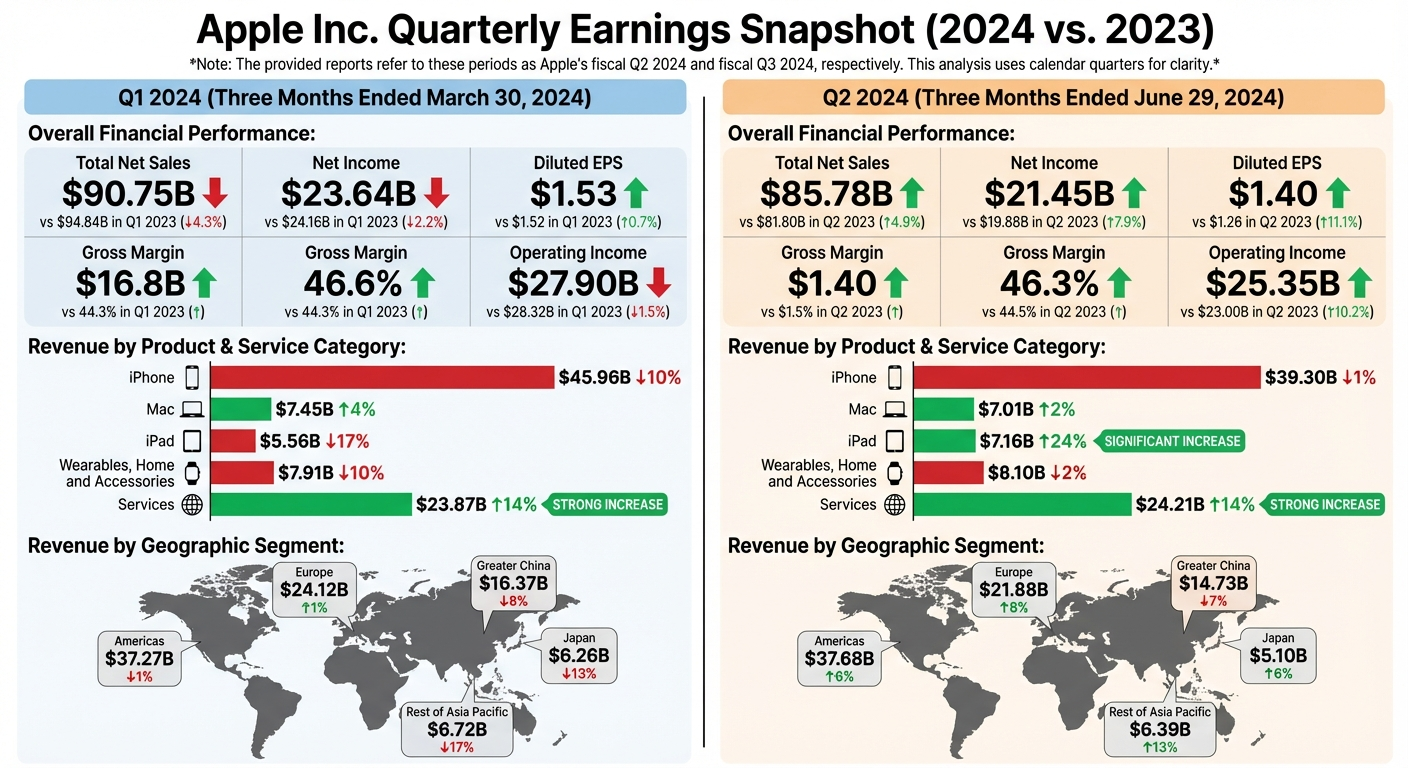

In [63]:
display(Image(base64.b64decode(image_response.content_blocks[0]['base64'])))

In [64]:
with open("data/images/apple_info.png", 'wb') as f:
    f.write(base64.b64decode(image_response.content_blocks[0]['base64']))